## Classification using Support Vector Machine (SVM) - Supervised Learning 

### Import libraries and load the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("data.csv") 

In [3]:
data.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [4]:
data.columns

Index([' Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201',
       'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203',
       ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602',
       'P603', 'Normal/Attack'],
      dtype='object')

In [5]:
data.dtypes

 Timestamp        object
FIT101           float64
LIT101           float64
 MV101             int64
P101               int64
P102               int64
 AIT201          float64
AIT202           float64
AIT203           float64
FIT201           float64
 MV201             int64
 P201              int64
 P202              int64
P203               int64
 P204              int64
P205               int64
P206               int64
DPIT301          float64
FIT301           float64
LIT301           float64
MV301              int64
MV302              int64
 MV303             int64
MV304              int64
P301               int64
P302               int64
AIT401           float64
AIT402           float64
FIT401           float64
LIT401           float64
P401               int64
P402               int64
P403               int64
P404               int64
UV401              int64
AIT501           float64
AIT502           float64
AIT503           float64
AIT504           float64
FIT501           float64


In [6]:
data.shape

(449919, 53)

In [7]:
data.shape[0] - data.dropna().shape[0]

0

### Preprocess the dataset

In [8]:
data = data.dropna()

##### drop the timestamp column as it is not required

In [9]:
data = data.drop(' Timestamp',axis=1)

##### convert output labels from string to integer format

In [10]:
status = {'Normal':0,'Attack':1}
data['Normal/Attack'] = [status[item] for item in data['Normal/Attack']] 

In [11]:
data.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0


##### shuffle the dataset so that the 2 classes are uniformly distributed

In [12]:
data = data.sample(frac = 1) 

In [13]:
data.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
58086,2.429619,542.0021,2,1,1,257.9146,8.425596,323.4812,0.000000,1,...,2,1,248.81440,0.977157,187.676200,0.000000,1,1,1,0
306613,2.433142,501.4932,2,2,1,177.2302,8.560818,316.1241,2.447954,2,...,2,1,252.54740,0.816967,190.255700,1.736712,1,2,1,0
174493,0.000000,585.3372,1,2,1,219.9756,8.503461,326.5573,2.458719,2,...,2,1,250.32040,1.457726,188.781700,0.000128,1,1,1,0
245835,0.000000,813.4349,1,1,1,192.8672,8.590618,350.4486,0.000000,1,...,1,1,10.06152,0.000000,3.733017,0.000000,1,1,1,1
33775,2.581110,527.0861,2,2,1,259.6129,8.367598,331.1202,2.439881,2,...,2,1,247.59680,1.457726,186.715000,0.000128,1,1,1,0


### Split the dataset into input and output

In [14]:
data = data[:100000]
x = data.drop('Normal/Attack',axis=1)
y = data['Normal/Attack']

In [15]:
x.shape

(100000, 51)

In [16]:
unique,frequency = np.unique(np.array(y), return_counts = True) 

([<matplotlib.patches.Wedge at 0xfc9c58>,
 [Text(-1.022843123280454, 0.4047121756976012, 'Normal'),
  Text(1.022843085388561, -0.4047122714630841, 'Attack')])

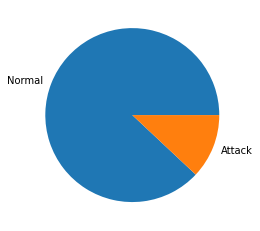

In [17]:
plt.pie(frequency,labels = ['Normal','Attack']) 

### Import the SVM classifier from sklearn

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Split the dataset into train and test data, Train the model

In [19]:
x = scale(x)
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [20]:
clf = SVC(kernel='rbf', gamma=0.01, C=100)
clf.fit(x_train, y_train)

SVC(C=100, gamma=0.01)

### Evaluate the performance of the trained model 

In [21]:
clf.score(x_test,y_test)

0.98668

In [22]:
prediction = clf.predict(x_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21947
           1       0.99      0.90      0.94      3053

    accuracy                           0.99     25000
   macro avg       0.99      0.95      0.97     25000
weighted avg       0.99      0.99      0.99     25000



##### print the confusion matrix and heatmap

In [23]:
import seaborn as sns

In [24]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[21926    21]
 [  312  2741]]


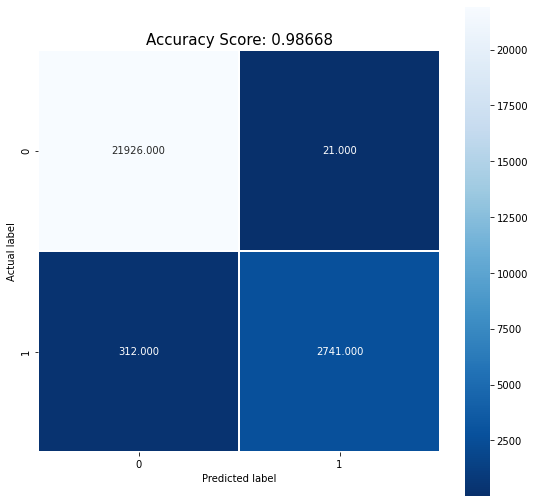

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = clf.score(x_test,y_test)

title = 'Accuracy Score: {0}'.format(score)
plt.title(title, size = 15);